In [1]:
import pandas as pd
import matplotlib as mat
from tabulate import tabulate 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)  

In [2]:
df=pd.read_excel('DS1_C5_S1_Income_Data_Challenge.xlsx')

## Task1:

In [3]:
df.columns

Index(['Age', 'WorkClass', 'Education', 'Education_Num', 'Marital_Status',
       'Occupation', 'Relationship', 'Gender', 'Hours_Per_Week',
       'Native_Country', 'Income_Bracket'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [5]:
df.isnull().sum()

Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [6]:
df.count()

Age               32561
WorkClass         32561
Education         32561
Education_Num     32561
Marital_Status    32561
Occupation        32561
Relationship      32561
Gender            32561
Hours_Per_Week    32561
Native_Country    32561
Income_Bracket    32561
dtype: int64

## Task2:

In [7]:
def separate(df):
    categorical = []
    continuous = []
    for column in df.columns:
        if df[column].nunique()<50:
            categorical.append(column)
        else:
             continuous.append(column)
                
    return categorical, continuous 
categorical, continuous = separate(df)
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical     continuous
--------------  --------------
WorkClass       Age
Education       Hours_Per_Week
Education_Num
Marital_Status
Occupation
Relationship
Gender
Native_Country
Income_Bracket


## Task3:

In [8]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Mode of {col} is {df[col].mode()[0]}")
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") 

In [9]:
info_of_cat('WorkClass')

Unique values in WorkClass are: [' State-gov' 'Self-emp' ' Private' ' Federal-gov' ' Local-gov' ' ?'
 ' Self-emp' ' Without-pay' ' Never-worked']
Mode of WorkClass is  Private
Number of missing values in WorkClass is 0


In [10]:
info_of_cat('Education')

Unique values in Education are: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Mode of Education is  HS-grad
Number of missing values in Education is 0


In [11]:
info_of_cat('Education_Num')

Unique values in Education_Num are: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Mode of Education_Num is 9
Number of missing values in Education_Num is 0


In [12]:
info_of_cat('Marital_Status')

Unique values in Marital_Status are: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Mode of Marital_Status is  Married-civ-spouse
Number of missing values in Marital_Status is 0


In [13]:
info_of_cat('Occupation')

Unique values in Occupation are: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Mode of Occupation is  Prof-specialty
Number of missing values in Occupation is 0


In [14]:
info_of_cat('Relationship')

Unique values in Relationship are: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Mode of Relationship is  Husband
Number of missing values in Relationship is 0


In [15]:
info_of_cat('Gender')

Unique values in Gender are: [' Male' ' Female']
Mode of Gender is  Male
Number of missing values in Gender is 0


In [16]:
info_of_cat('Native_Country')

Unique values in Native_Country are: [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
Mode of Native_Country is  United-States
Number of missing values in Native_Country is 0


In [17]:
info_of_cat('Income_Bracket')

Unique values in Income_Bracket are: [' <=50K' ' >50K']
Mode of Income_Bracket is  <=50K
Number of missing values in Income_Bracket is 0


## Task4:

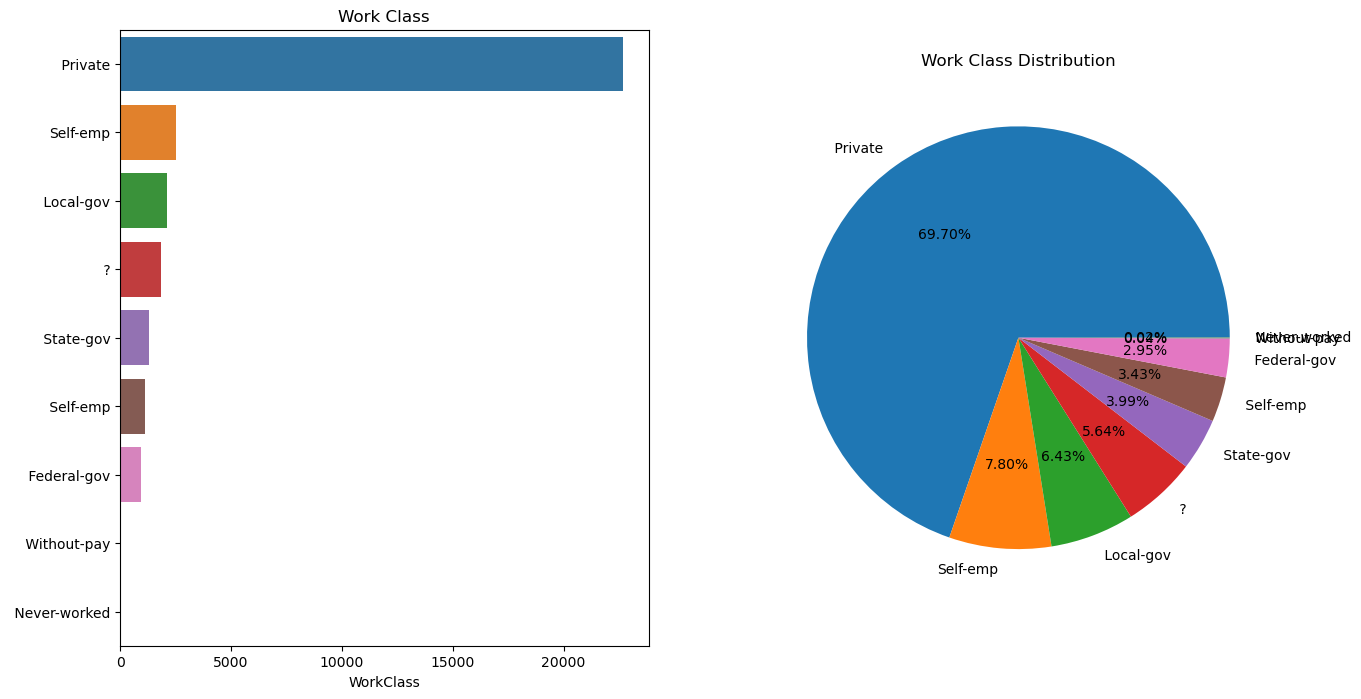

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
ax[0].set_title("Work Class")
percentage = df["WorkClass"].value_counts()
labels = list(df["WorkClass"].value_counts().index)
sns.barplot(x=percentage, y=labels, ax=ax[0])
ax[1].set_title("Work Class Distribution")
ax[1].pie(percentage, labels=labels, autopct="%0.2f%%")
plt.show()

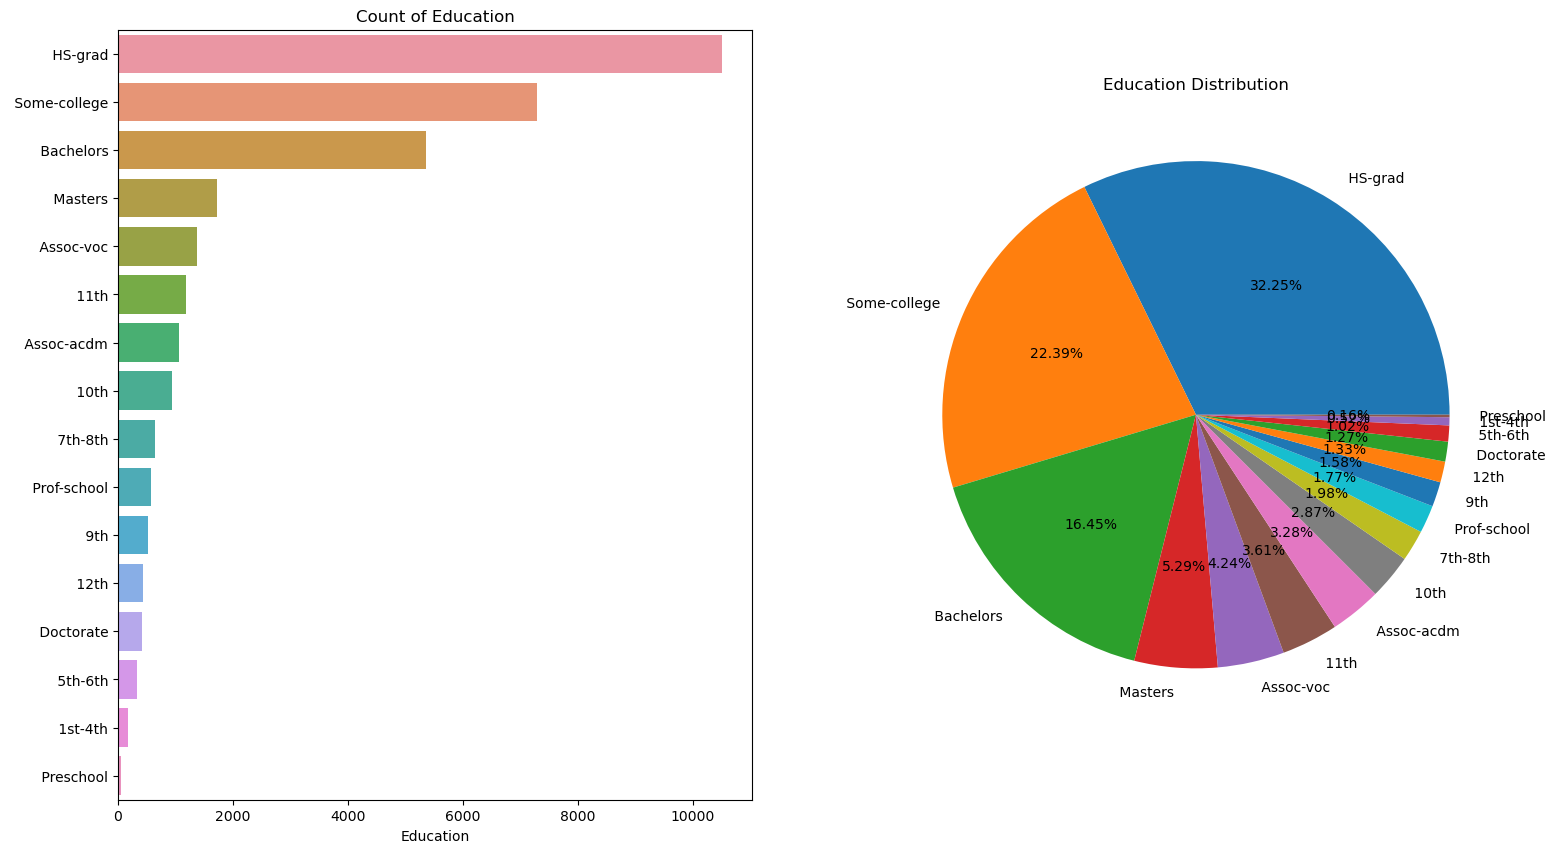

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(18,10))
ax[0].set_title("Count of Education")
percentage = df["Education"].value_counts()
labels = list(df["Education"].value_counts().index)
sns.barplot(x=percentage, y=labels, ax=ax[0])
ax[1].set_title("Education Distribution")
ax[1].pie(percentage, labels=labels, autopct="%0.2f%%")
plt.show()

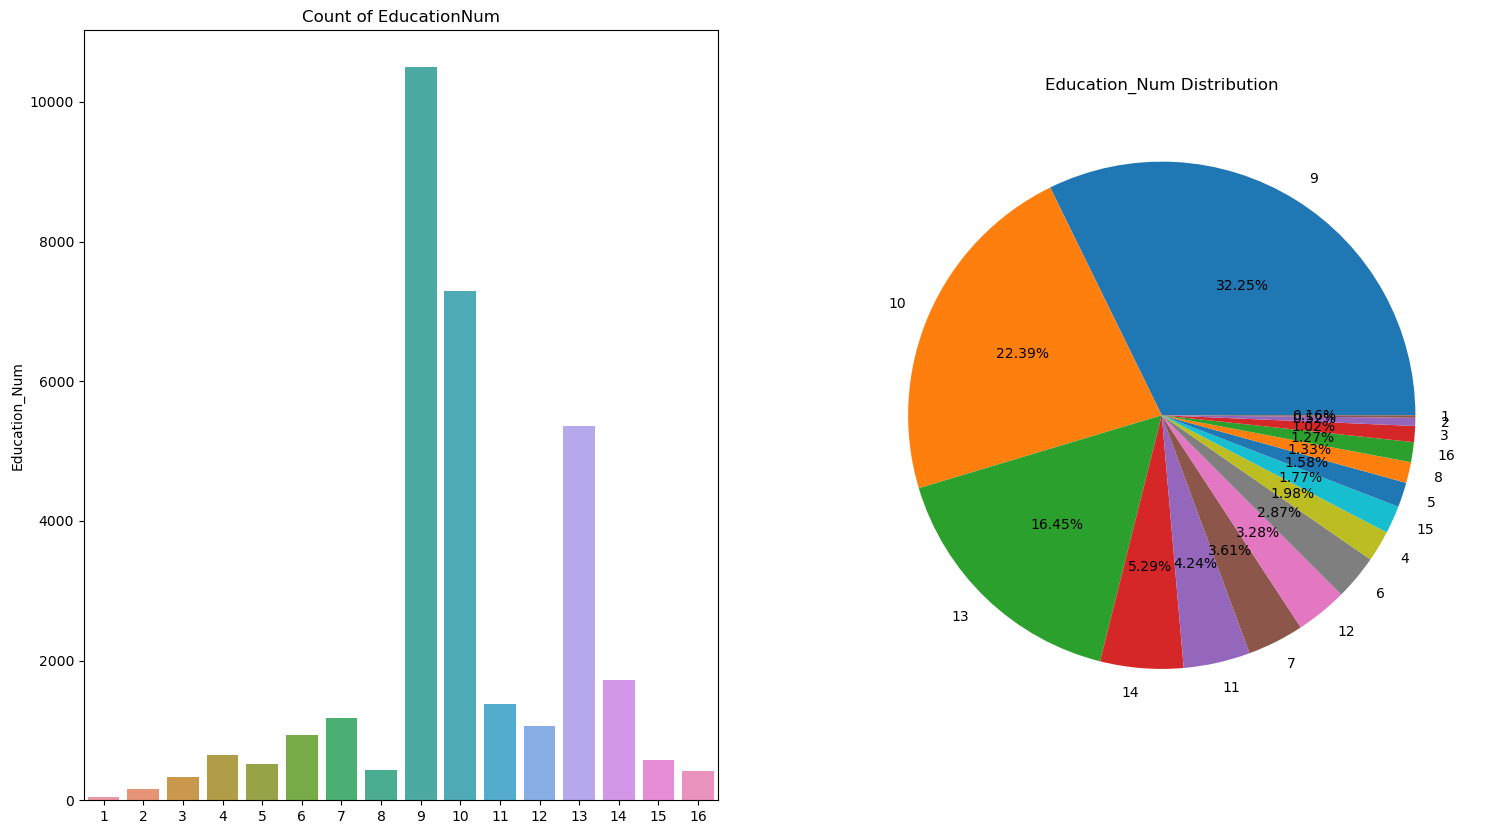

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(18,10))
ax[0].set_title("Count of EducationNum")
percentage = df["Education_Num"].value_counts()
labels = list(df["Education_Num"].value_counts().index)
sns.barplot(y=percentage,x=labels, ax=ax[0])
ax[1].set_title("Education_Num Distribution")
ax[1].pie(percentage, labels=labels, autopct="%0.2f%%")
plt.show()

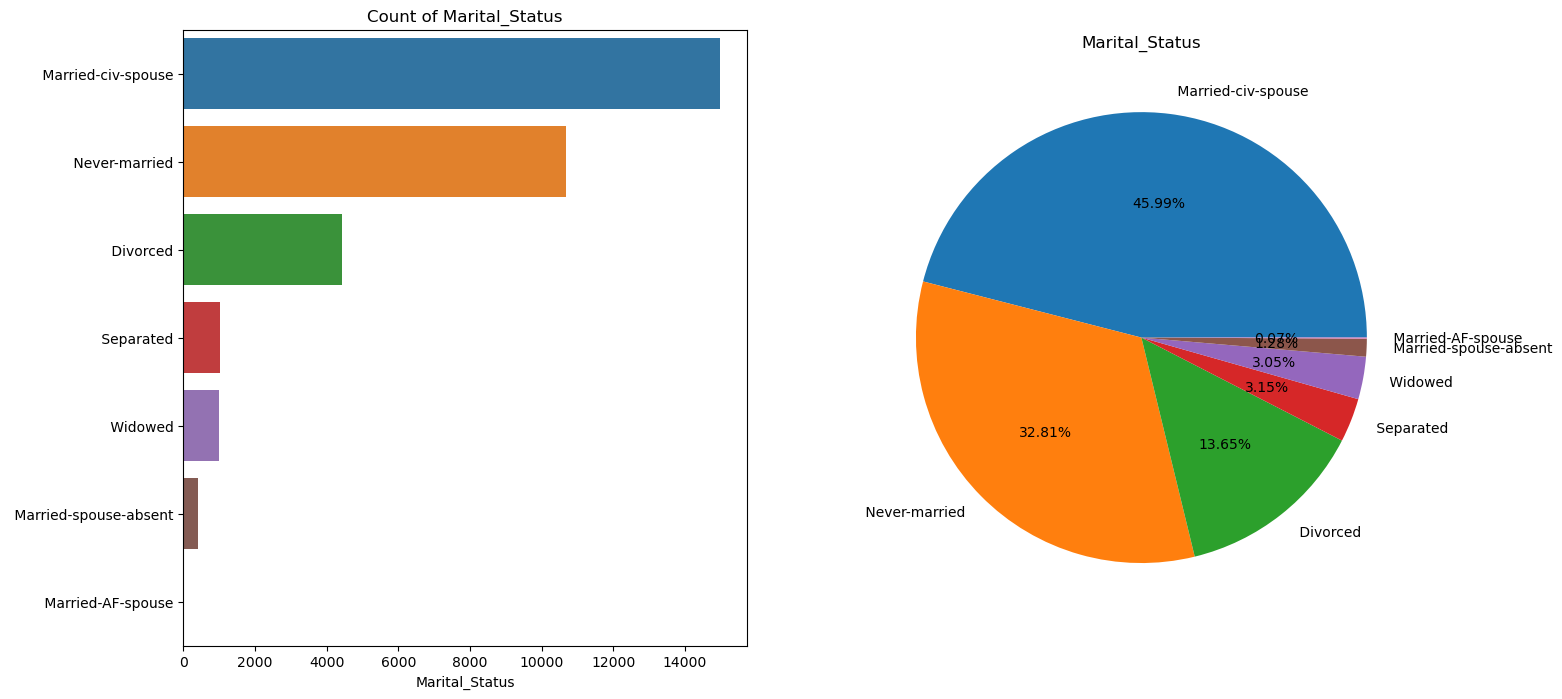

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].set_title("Count of Marital_Status")
percentage = df["Marital_Status"].value_counts()
labels = list(df["Marital_Status"].value_counts().index)
sns.barplot(x=percentage, y=labels, ax=ax[0])
ax[1].set_title("Marital_Status")
ax[1].pie(percentage, labels=labels, autopct="%0.2f%%")
plt.show()

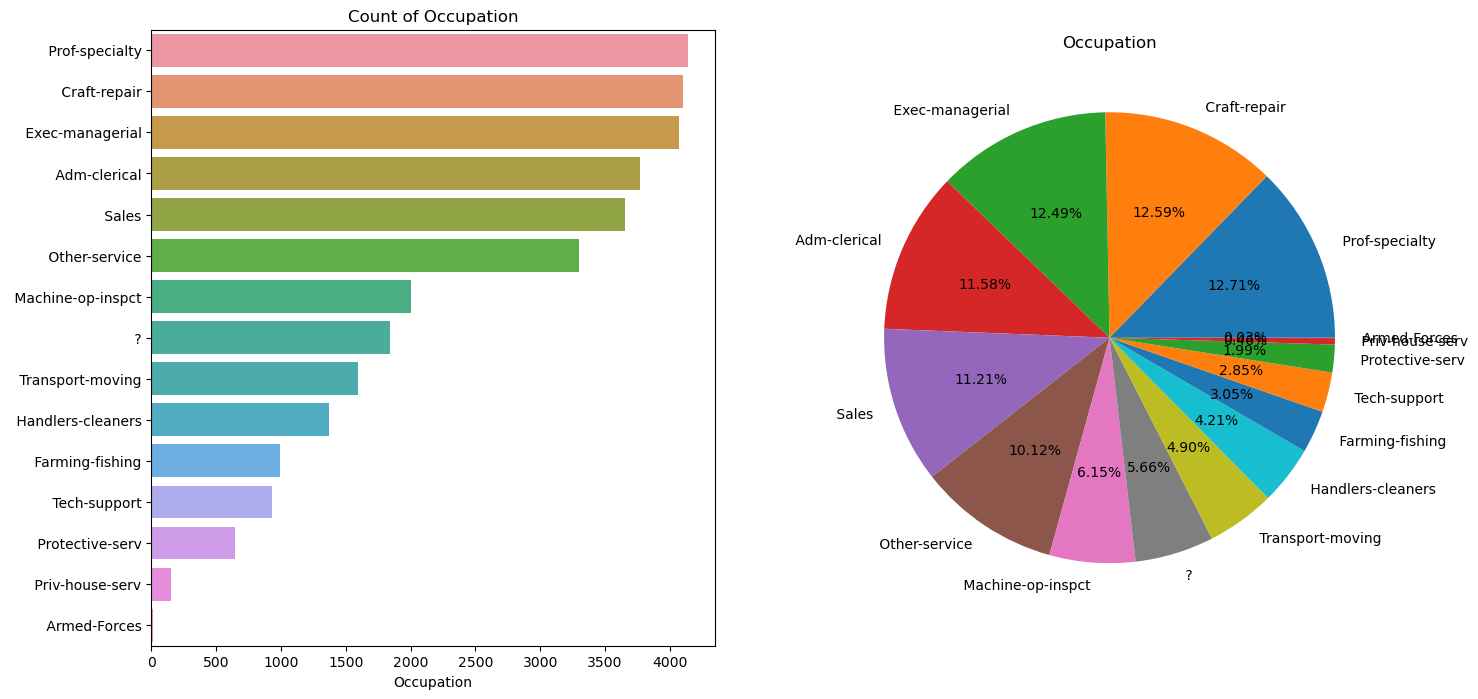

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].set_title("Count of Occupation")
percentage = df["Occupation"].value_counts()
labels = list(df["Occupation"].value_counts().index)
sns.barplot(x=percentage, y=labels, ax=ax[0])
ax[1].set_title("Occupation")
ax[1].pie(percentage, labels=labels, autopct="%0.2f%%")
plt.show()

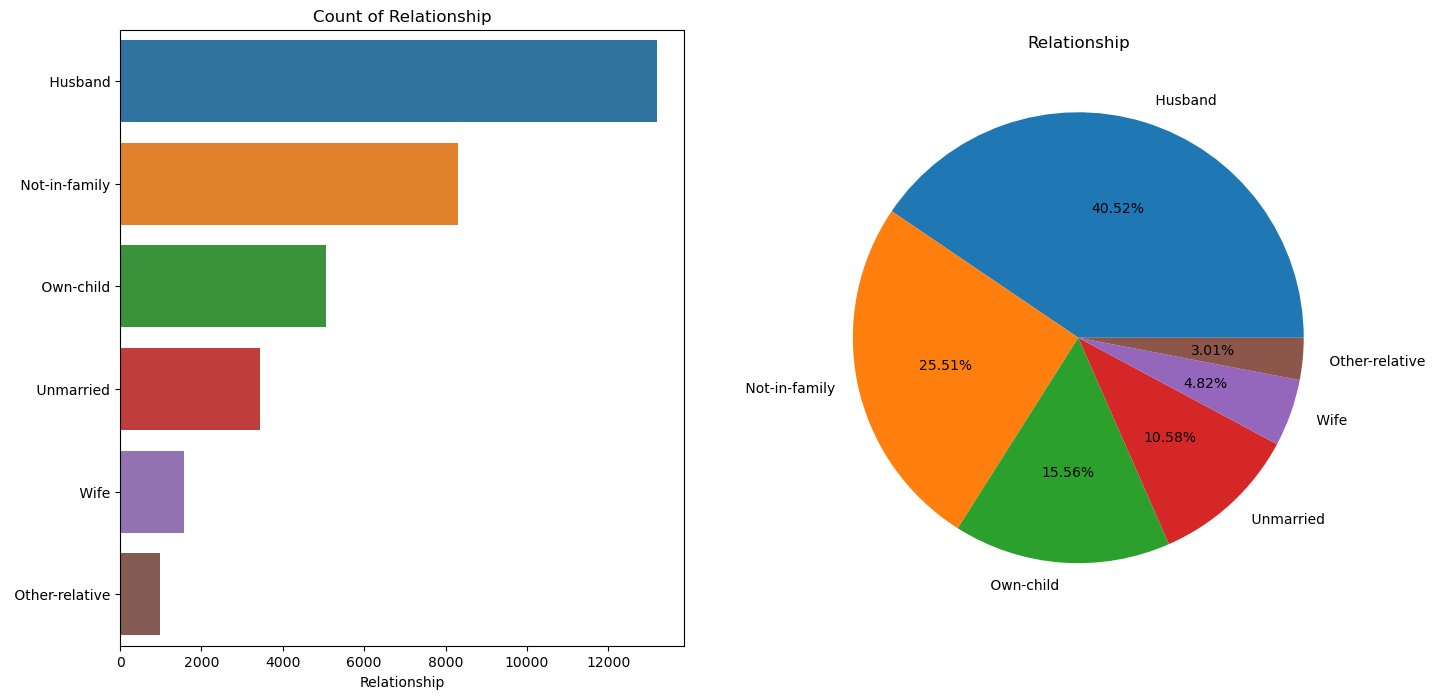

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(16,8))
ax[0].set_title("Count of Relationship")
percentage = df["Relationship"].value_counts()
labels = list(df["Relationship"].value_counts().index)
sns.barplot(x=percentage, y=labels, ax=ax[0])
ax[1].set_title("Relationship")
ax[1].pie(percentage, labels=labels, autopct="%0.2f%%")
plt.show()

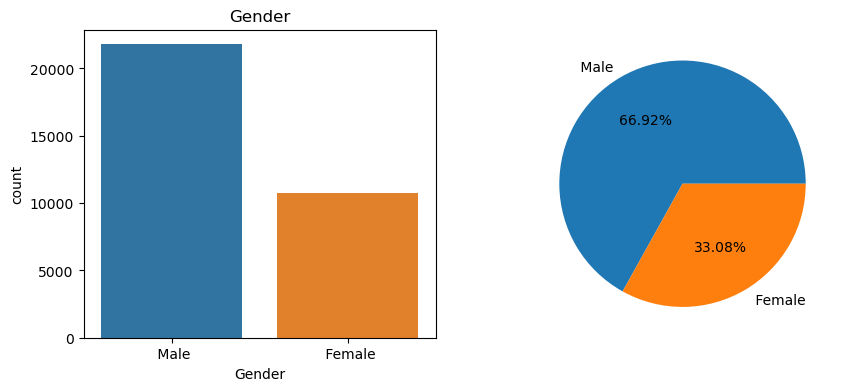

In [54]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))
ax[0].set_title("Gender")                  
percentage = df["Gender"].value_counts()        
labels = list(df["Gender"].value_counts().index) 
sns.countplot(x = df["Gender"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

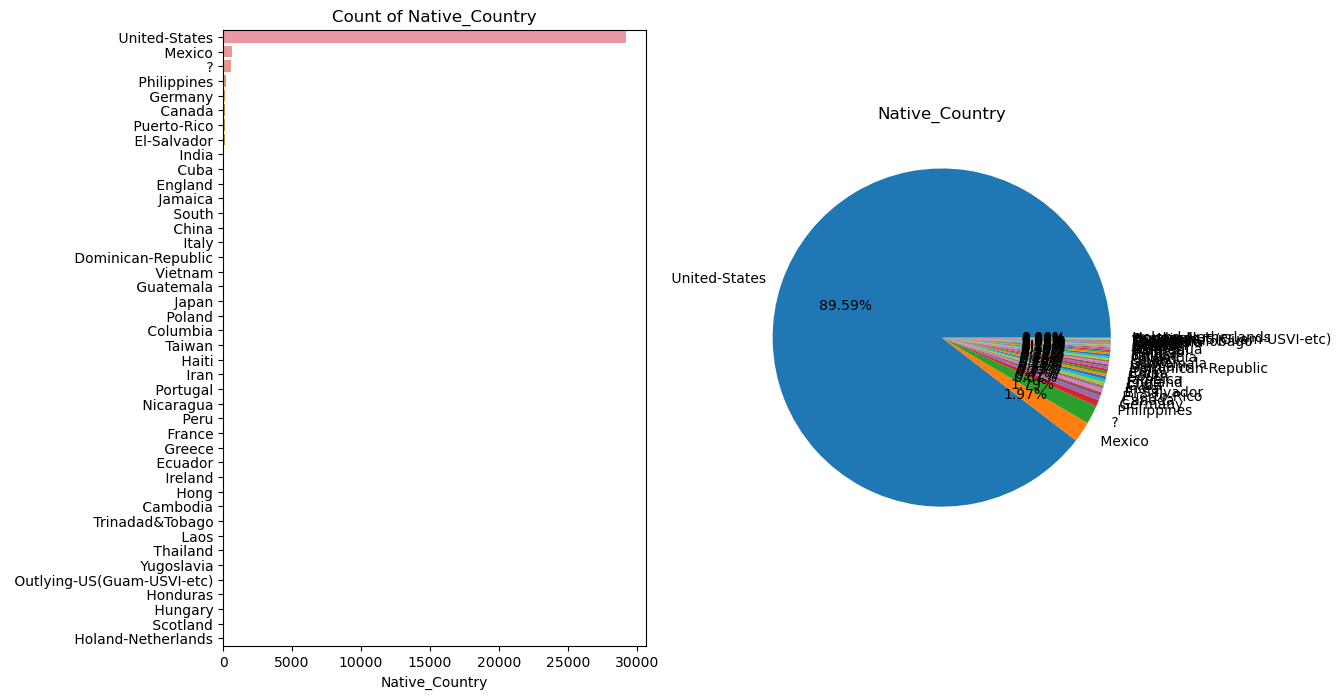

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))
ax[0].set_title("Count of Native_Country")
percentage = df["Native_Country"].value_counts()
labels = list(df["Native_Country"].value_counts().index)
sns.barplot(x=percentage, y=labels, ax=ax[0])
ax[1].set_title("Native_Country")
ax[1].pie(percentage, labels=labels, autopct="%0.2f%%")
plt.show()

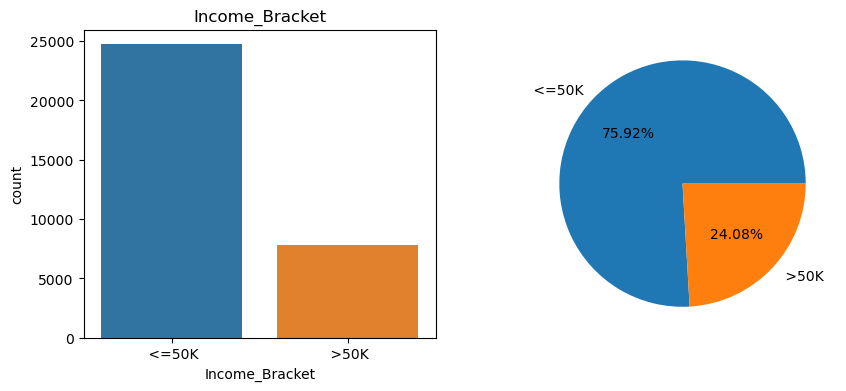

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (10,4))
ax[0].set_title("Income_Bracket")                  
percentage = df["Income_Bracket"].value_counts()        
labels = list(df["Income_Bracket"].value_counts().index) 
sns.countplot(x = df["Income_Bracket"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.show()

## Task5:

In [27]:
def T5(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")
    print(f"The Skewness of the {col} is {df[col].skew()}")

In [28]:
T5('Age')

The mean of the Age is 38.58164675532078
The median of the Age is 37.0
The mode of the Age is 36
The standard deviation of the Age is 13.640432553581146
Number of missing values in the Age is 0
The Skewness of the Age is 0.5587433694130484


In [29]:
T5('Education_Num')

The mean of the Education_Num is 10.0806793403151
The median of the Education_Num is 10.0
The mode of the Education_Num is 9
The standard deviation of the Education_Num is 2.5727203320673406
Number of missing values in the Education_Num is 0
The Skewness of the Education_Num is -0.3116758679102297


In [30]:
T5('Hours_Per_Week')

The mean of the Hours_Per_Week is 40.437455852092995
The median of the Hours_Per_Week is 40.0
The mode of the Hours_Per_Week is 40
The standard deviation of the Hours_Per_Week is 12.34742868173081
Number of missing values in the Hours_Per_Week is 0
The Skewness of the Hours_Per_Week is 0.22764253680450092


## Task6:

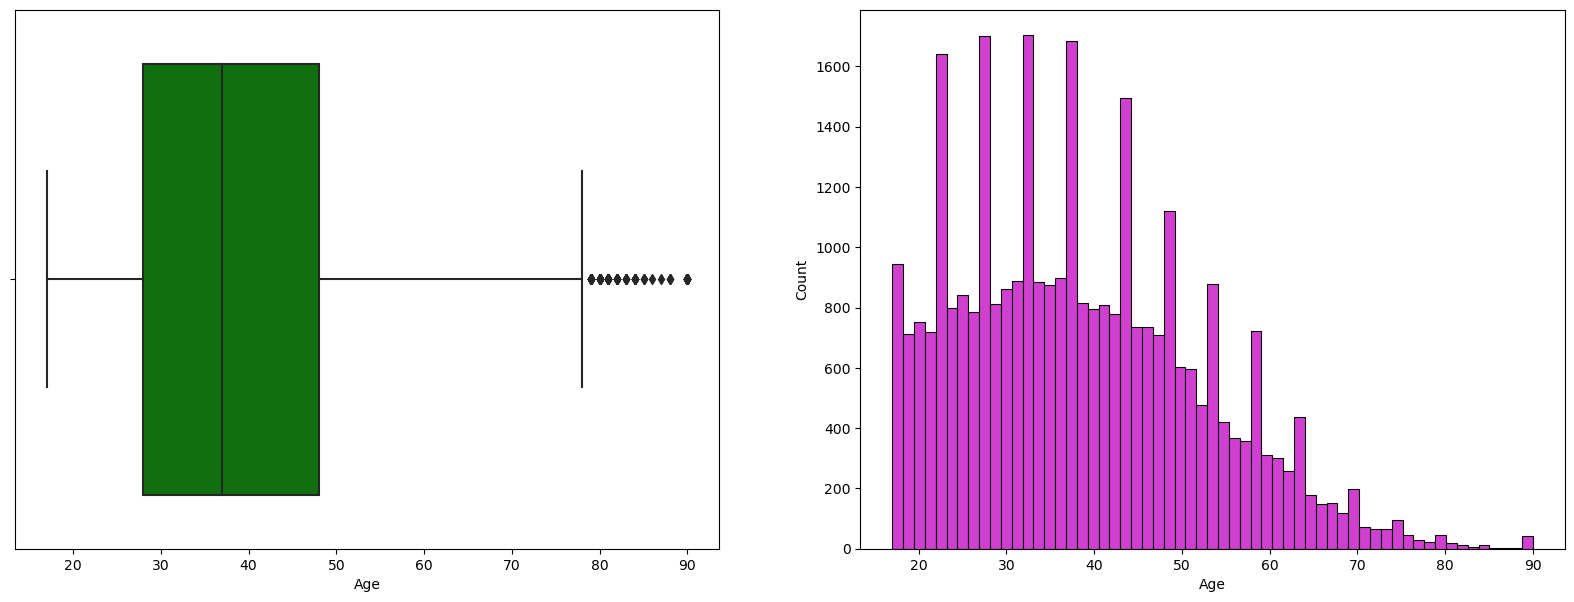

In [31]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))             
sns.histplot(x = df["Age"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Age"], ax = ax[0], color = "g") 
plt.show()

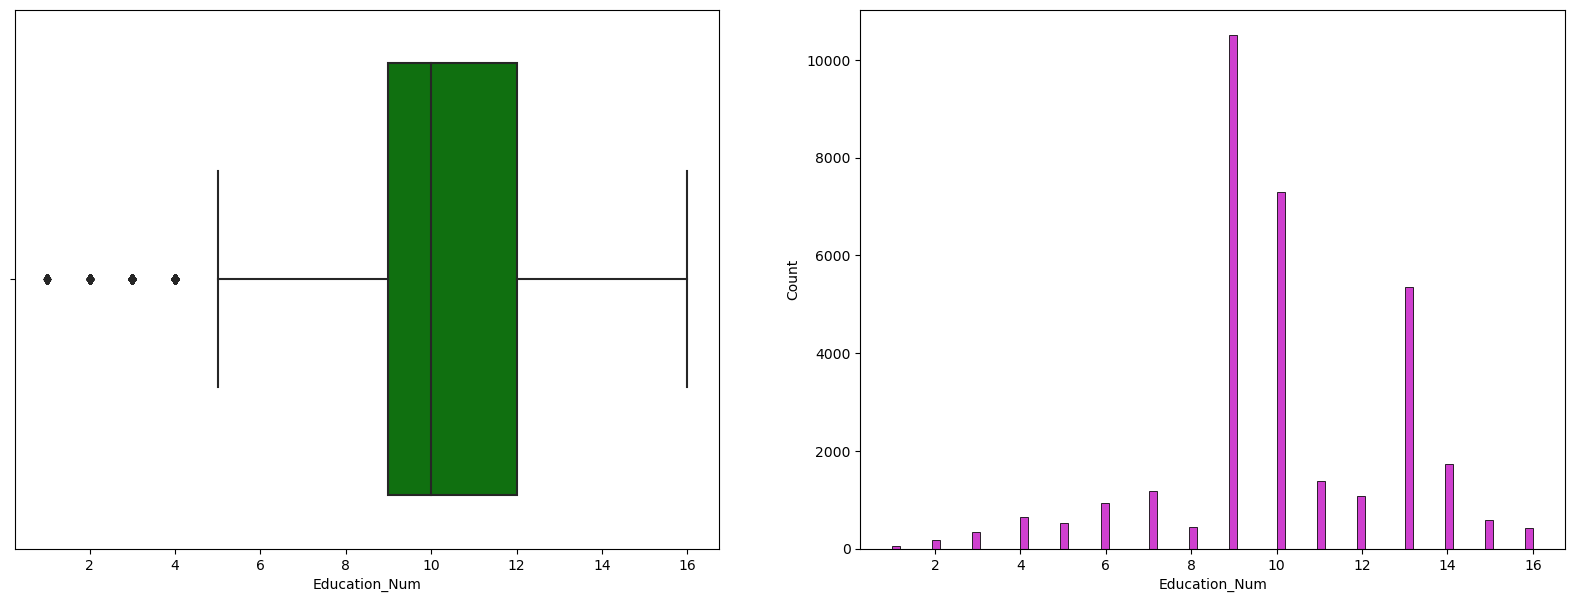

In [32]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))             
sns.histplot(x = df["Education_Num"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Education_Num"], ax = ax[0], color = "g") 
plt.show()

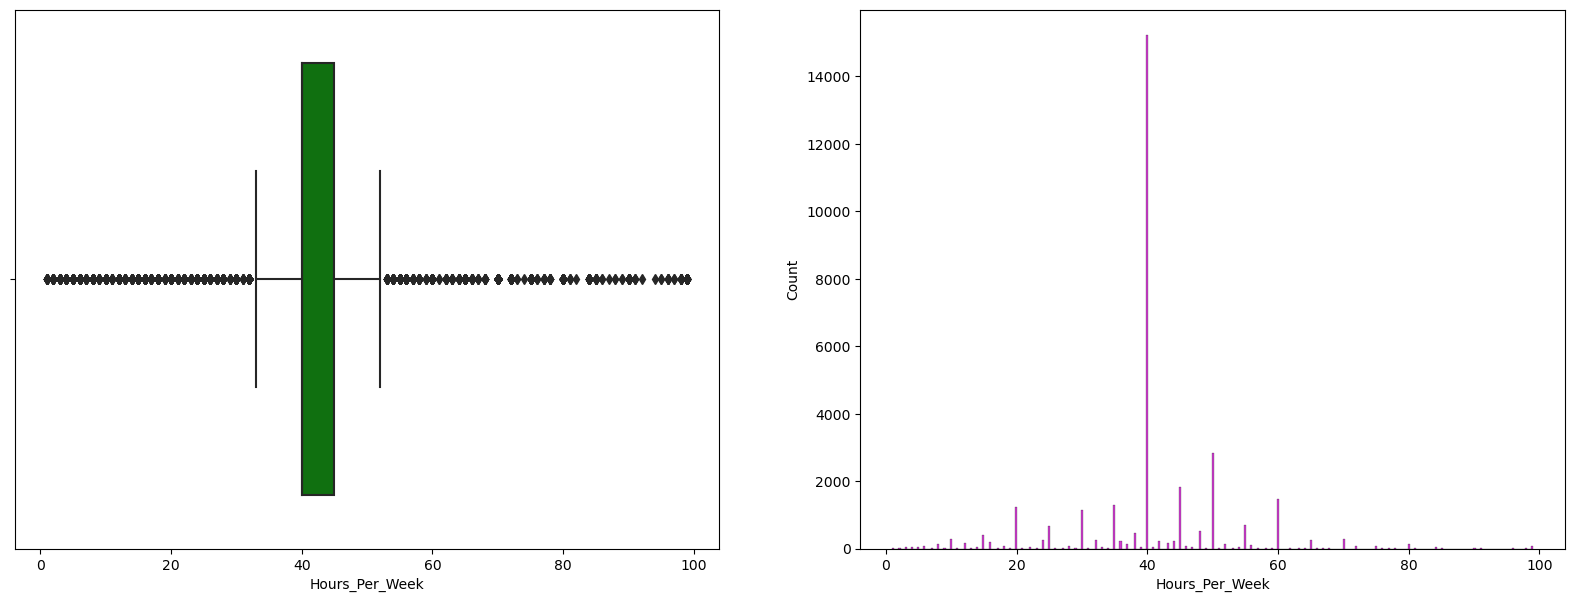

In [33]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))             
sns.histplot(x = df["Hours_Per_Week"], ax =ax[1], color = "m") 
sns.boxplot(x = df["Hours_Per_Week"], ax = ax[0], color = "g") 
plt.show()